## Installation and loading of libraries
``` 
$ pip3 install top2vec
$ pip3 install spacy
```

In [1]:
from top2vec import Top2Vec

import os
import spacy
import unidecode

import pandas as pd
import numpy as np


2022-12-25 08:10:18.336638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 08:10:18.615644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-25 08:10:18.615675: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-25 08:10:19.840668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

Variable for testing data on the way. We can use this number n for the song we are investigating.

In [2]:
n = 500

## Read songs from files

In [3]:
def getlistOfFilenames(rootdir):
    # input: directory with (subdirectory with) TXT-files to be handled
	# output: list of files lexicographically ordered on path-name

    files_all = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if not file.endswith('.txt'):
                continue
            fn = os.path.join(subdir, file)
            files_all.append(fn)

    files_all = sorted(files_all)
    return files_all

liedjesFilenames = getlistOfFilenames('../../data/liedjes')

In [4]:
liedjesFilenames[n]

'../../data/liedjes/utrecht1851-feestbundel1855/utrecht1851-feestbundel1855-18.txt'

In [5]:
def getlistOfTexts(listOfFilenames):
	# input: list of TXT-files lexicographically ordered on path-name
    # output: list of texts

	texts = []
	for file in listOfFilenames:
		with open(file) as stream:
			text = stream.read()
		texts.append(text)

	return texts

liedjesList = getlistOfTexts(liedjesFilenames)

In [6]:
print(liedjesList[n])

Drinklied

Komt Broeders juicht! Komt Broeders juicht!
Op ’t blijde Kopperfeest !
De zorgen van het hart geweerd,
Nu enkel vreugd hier triomfeert !
Komt Broeders, juicht! enz.

Komt vult het glas! komt vult het glas!
Ter eer van ’t Kopperfeest !
De wijn is ’t, die het hart verheugt ,
En zingend drinken schenkt ook vreugd !
Komt vult het glas! enz.

Nu ’t glaasje aan den mond gebragt,
Met hoogst verblijden geest !
En drinken wij ’t ten bodem uit
Op ’t heil der Drukkunst — tot besluit !
Nu ’t glaasje enz.




## Preprocess songs

In [7]:
def lemmatize(texts, allowed_postags=["NOUN", "ADJ", "ADV"]):   
    # input: list of texts
    # input: allowed_postags is list of wordtypes to be kept in the lemmatization process
    # output: list of lemmatized texts. Lemmatization by spaCy.

    nlp = spacy.load("nl_core_news_sm") # create spaCy processor named 'nlp' based on small model for Dutch

    result = []                                                         
    for text in texts:                                                     

        nlp.max_length = len(text)  
        doc = nlp(text) # tokenize and annotate 'text' with processor named 'nlp'

        new_text = []
        for token in doc: 
            if token.is_alpha: # keep tokens with alphanumerical characters (so no numbers or punctuation)
                if not token.is_stop: # remove stopwords
                    if token.pos_ in allowed_postags: # keep wordtypes in the allowed_postags list
                        new_text.append(unidecode.unidecode(token.lemma_)) # get the word in the lemma and add it to the list of words

        result.append(new_text) # add list-of-words to the list of lemmatized texts

    return result

lemmatizedLiedjesList = lemmatize(liedjesList)

In [8]:
print(lemmatizedLiedjesList[n])

['Drinklied', 'zorg', 'hart', 'vreugd', 'toejuichen', 'vult', 'glas', 'vult', 'glas', 'eer', 'wijn', 'hart', 'drinken', 'vreugd', 'vult', 'glas', 'glas', 'mond', 'hoog', 'geest', 'bodem', 'heil', 'besluit', 'glaas']


In [9]:
def replace(listOfWords, replaceWords):
    i = 0
    for word in listOfWords:
        if word in replaceWords:
            listOfWords[i] = replaceWords[word]
        i = i + 1

    return listOfWords

def remove(listOfWords, removeWords):
    i = 0
    for word in listOfWords:
        if word in removeWords:
            listOfWords.pop(i)
        i = i + 1

    return listOfWords


In [10]:
replaceDict = {"koster":"coster", "costers":"coster", "kosters":"coster", "vreugd":"vreugde", "blijd":"blijde"}
removeList = ["deez", "zoo", "hoezee", "tra", "la", "li", "eene", "gaan", "komen", "laten", "weer", "vinden", "uw", "staan", "waarmee", "immer", "t", "d", "wijze"]

preprocessedLiedjesList = []
for liedje in lemmatizedLiedjesList:
    preprocessedLiedje = " ".join(remove(replace(liedje, replaceDict), removeList))
    preprocessedLiedjesList.append(preprocessedLiedje)


In [11]:
print(preprocessedLiedjesList[n])

Drinklied zorg hart vreugde toejuichen vult glas vult glas eer wijn hart drinken vreugde vult glas glas mond hoog geest bodem heil besluit glaas


## Train model

In [24]:
model = Top2Vec(preprocessedLiedjesList)

2022-12-25 08:21:41,047 - top2vec - INFO - Pre-processing documents for training
2022-12-25 08:21:41,147 - top2vec - INFO - Creating joint document/word embedding
2022-12-25 08:21:42,026 - top2vec - INFO - Creating lower dimension embedding of documents
2022-12-25 08:21:48,660 - top2vec - INFO - Finding dense areas of documents
2022-12-25 08:21:48,674 - top2vec - INFO - Finding topics


In [25]:
model.topic_sizes

0    469
1    260
dtype: int64

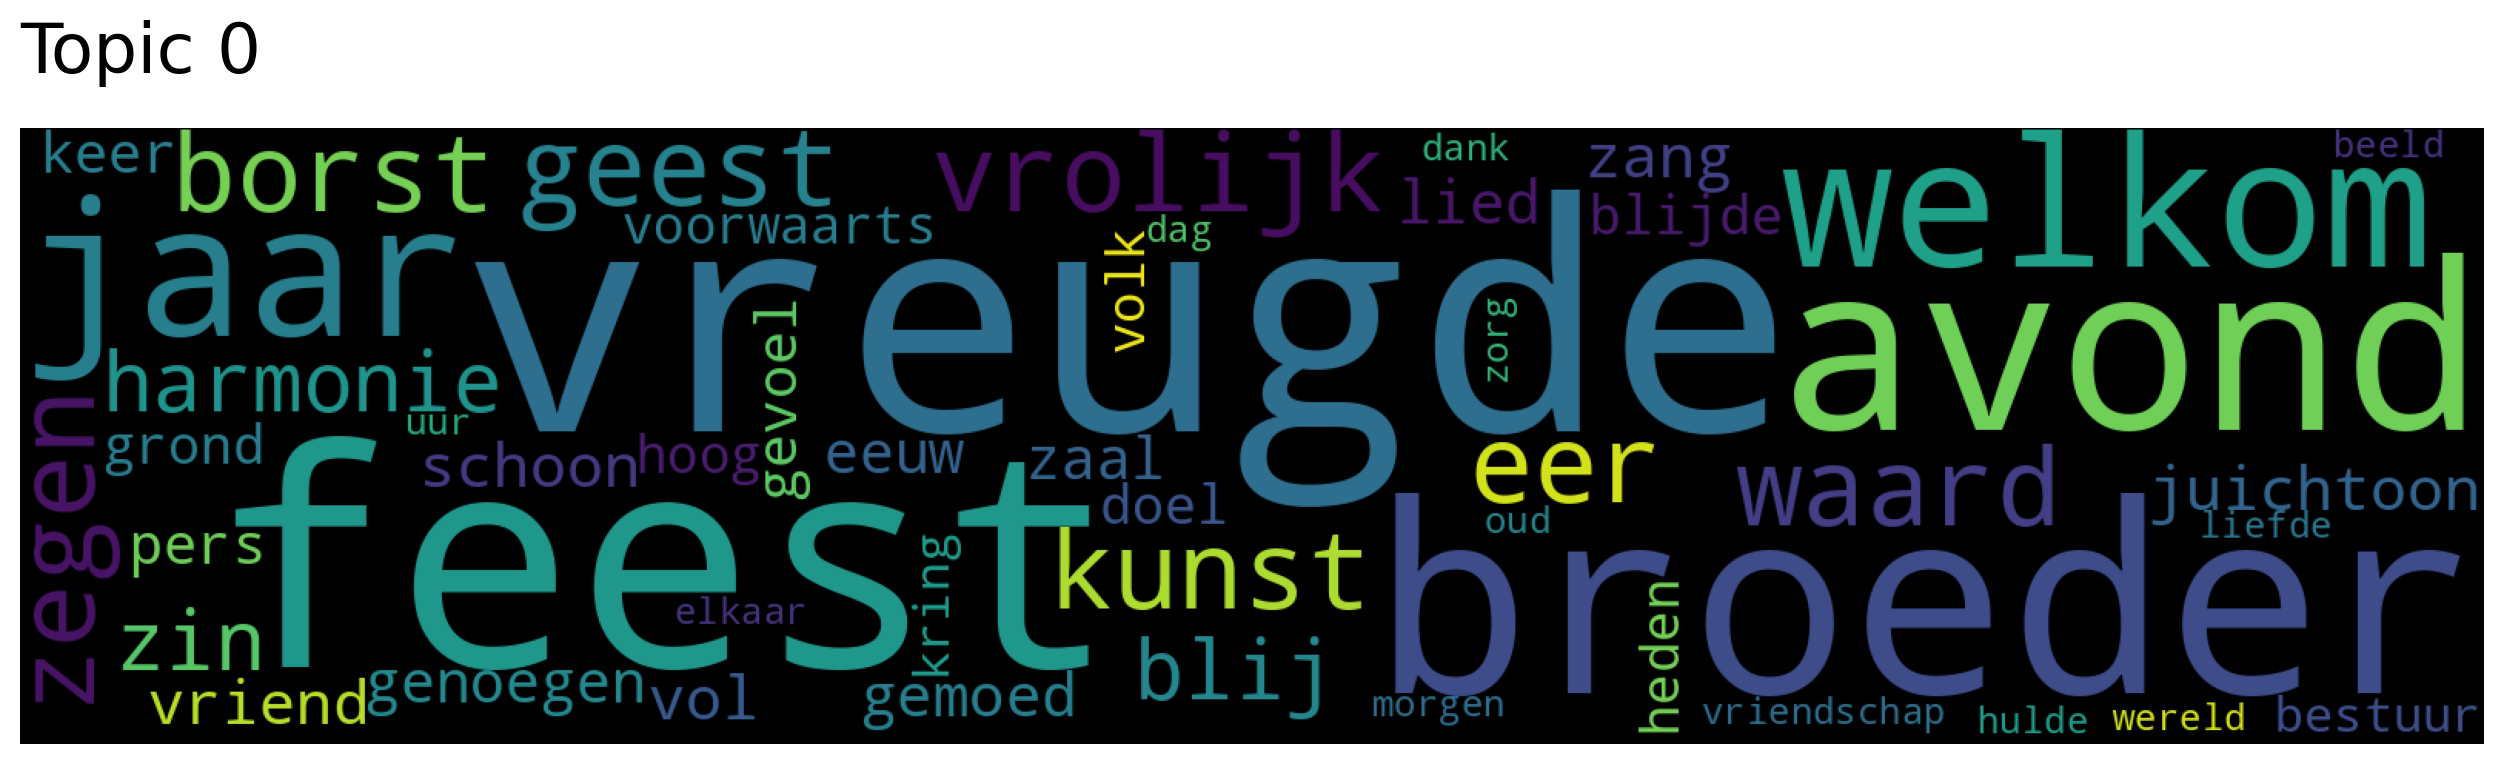

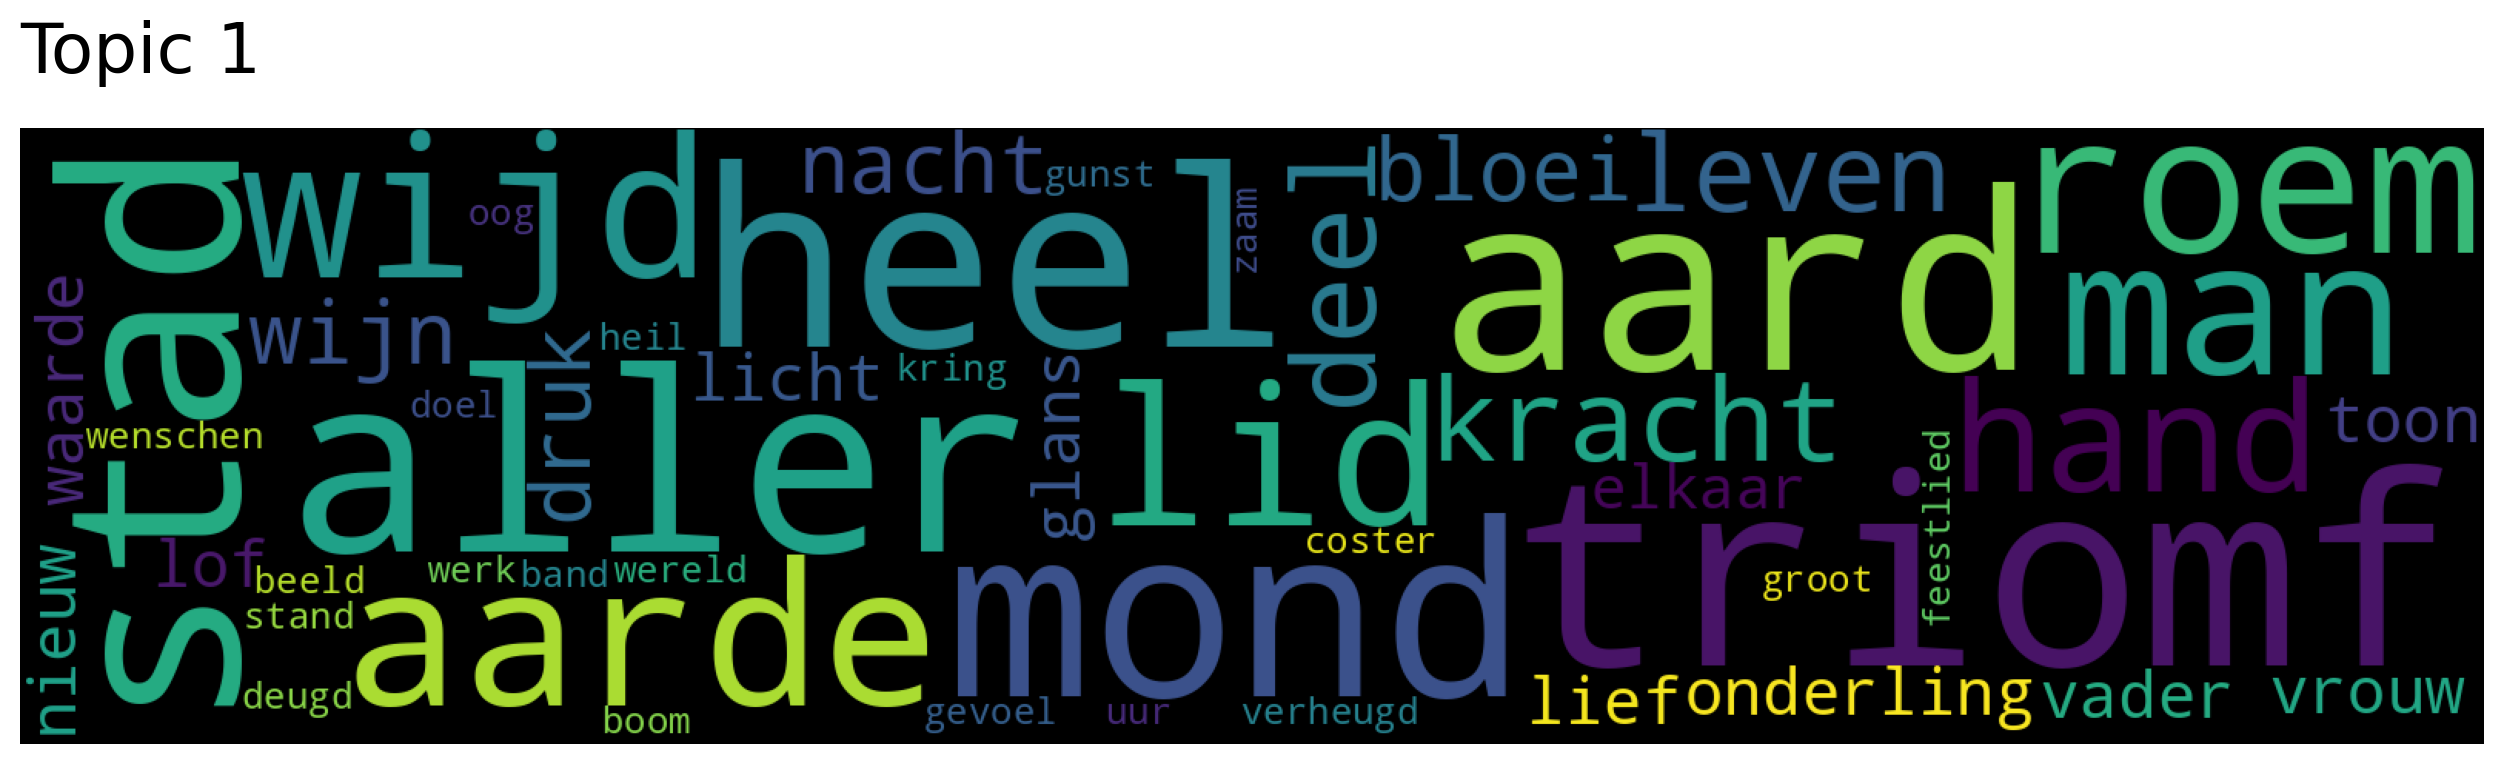

In [26]:
topic_sizes, topic_nums = model.get_topic_sizes()
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [27]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["wijn", "glas"], num_docs=3)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")

Document: 350, Score: 0.25427141785621643
Document: 526, Score: 0.20574811100959778
Document: 370, Score: 0.19625094532966614


In [28]:
model.get_documents_topics([n])

(array([1]),
 array([0.02781799], dtype=float32),
 array([['triomf', 'aller', 'aard', 'heel', 'stad', 'mond', 'aarde',
         'wijd', 'roem', 'lid', 'man', 'hand', 'kracht', 'deel', 'leven',
         'bloei', 'wijn', 'nacht', 'druk', 'onderling', 'lof', 'vader',
         'vrouw', 'glans', 'licht', 'waarde', 'lief', 'toon', 'nieuw',
         'elkaar', 'verheugd', 'groot', 'feestlied', 'uur', 'kring',
         'heil', 'band', 'beeld', 'werk', 'wereld', 'gunst', 'coster',
         'deugd', 'stand', 'doel', 'gevoel', 'oog', 'boom', 'zaam',
         'wenschen']], dtype='<U11'),
 array([[ 0.22025946,  0.11700252,  0.09507661,  0.08660174,  0.07940678,
          0.07540438,  0.06918277,  0.06145366,  0.06046025,  0.04269928,
          0.02961747,  0.01887413,  0.01381494,  0.01340569,  0.01248459,
          0.01117087,  0.01108421,  0.0060458 ,  0.00385312,  0.00140136,
          0.00054843, -0.0005456 , -0.00129734, -0.00953778, -0.01896987,
         -0.02472766, -0.03087864, -0.03122772, 

In [31]:
liedjesDataframe = pd.read_csv("../../data/liedjes/liedjes.csv")

doc_ids = list(range(0, 728))
topics, topic_scores, topic_words, words_score = model.get_documents_topics(doc_ids)

liedjesDataframe['topic'] = topics
liedjesDataframe['topic_score'] = topic_scores

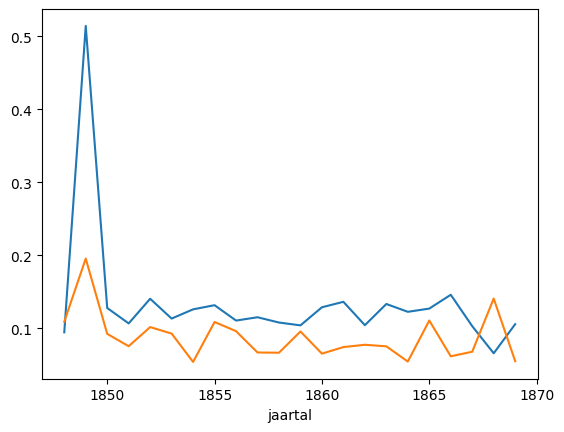

In [32]:
for topic in topic_nums:
    df = liedjesDataframe.loc[liedjesDataframe.topic == topic]
    dfAvg = df.groupby('jaartal').mean('topic_score')
    dfAvg['topic_score'].plot()
